In [3]:
from codecarbon import EmissionsTracker
import Config as CON
import os
import sys
import random
import json
import time
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import string

import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#Declare some necessary global functions and objects
current_time_ms = lambda: int(round(time.time() * 1000))

## Read NERE entries along with tf-idf values

In [19]:
readable_nere = []
with open("readable_nere.txt", "r") as fr:
    lines = fr.readlines()
    
    for line in lines:
        nere = {}
        comma_index = line.find(", ")
        end_paren_index = line.find(") => ")
        begin_tf_index = line.find(" [")
        nere["e1"] = line[1:comma_index]
        nere["e2"] = line[comma_index+2:end_paren_index]
        nere["r"] = line[end_paren_index+5:begin_tf_index]
        nere["tf_idf"] = float(line[begin_tf_index+2:-2])
        readable_nere.append(nere)

#print(readable_nere)        
nere_sorted = sorted(readable_nere, key = lambda i: i['tf_idf'],reverse=True)
for nere in nere_sorted:
    print("(%s, %s) => %s [%f]"%(nere["e1"], nere["e2"], nere["r"], nere["tf_idf"]))

(art, science) => To cite [29.400039]
(nitrogen, nitrogen oxides) => (NOx), [29.400039]
(gas, petroleum) => liquefy [29.400039]
(petroleum, gas) => liquefy [29.400039]
(light, lighting) => light [29.400039]
(light, lightning) => lightning [29.400039]
(organic compounds, volatile organic compounds) => (VOCs) [29.400039]
(volatile organic compounds, organic compounds) => (VOCs) [29.400039]
(marine, isotope) => (MIS) [29.400039]
(science, art) => To cite [29.400039]
(nitrogen oxides, nitrogen) => (NOx), [29.400039]
(lighting, light) => light [29.400039]
(isotope, marine) => (MIS) [29.400039]
(lightning, light) => lightning [29.400039]
(soil, strain) => was isolated [27.958680]
(strain, soil) => was isolated [27.958680]
(emissions, trade) => embody [27.115539]
(chemical, weathering) => weather [27.115539]
(oxygen, species) => (ROS) [27.115539]
(oxygen, reactive oxygen species) => (ROS) [27.115539]
(trade, emissions) => embody [27.115539]
(computational fluid dynamics, dynamics) => (CFD) [2

(feedback, change) => to climate [13.533371]
(technology, art) => introduce [13.528641]
(art, technology) => introduce [13.528641]
(extraction, chromatography) => follow [13.525110]
(chromatography, extraction) => follow [13.525110]
(region, response) => to climate [13.504044]
(response, region) => to climate [13.504044]
(environment, environmental impacts) => associate [13.496252]
(environmental impacts, environment) => associate [13.496252]
(climate change, ecosystems) => to climate [13.493036]
(ecosystems, climate change) => to climate [13.493036]
(simulation, atmosphere) => couple [13.480285]
(atmosphere, simulation) => couple [13.480285]
(surface, removal) => construct [13.475675]
(removal, surface) => construct [13.475675]
(warming, response) => to climate [13.469323]
(response, warming) => to climate [13.469323]
(emissions, carbon dioxide) => to reduce [13.464113]
(carbon dioxide, emissions) => to reduce [13.464113]
(future, gene) => compromise [13.460825]
(gene, future) => comp

(development, implementation) => develop [11.920208]
(implementation, development) => develop [11.920208]
(environment, environmental change) => provide [11.920144]
(environmental change, environment) => provide [11.920144]
(trend, surface air temperature) => warm [11.916954]
(surface air temperature, trend) => warm [11.916954]
(power, control) => base [11.915421]
(control, power) => base [11.915421]
(atmosphere, circulation) => couple [11.914474]
(circulation, atmosphere) => couple [11.914474]
(environmental, capacity) => carry [11.912538]
(capacity, environmental) => carry [11.912538]
(carbon, carbon monoxide) => = [11.912235]
(carbon monoxide, carbon) => = [11.912235]
(dep, information) => provide [11.899728]
(information, dep) => provide [11.899728]
(tropical, forests) => suggest [11.894215]
(forests, tropical) => suggest [11.894215]
(environment, prevention) => analyze [11.891760]
(measures, system) => analyze [11.891760]
(system, measures) => analyze [11.891760]
(prevention, envi

(climate, greenhouse gases) => increase [10.318959]
(climate, gases) => increase [10.318959]
(air, diseases) => increase [10.318959]
(air, depth) => increase [10.318959]
(air, soil moisture) => increase [10.318959]
(air, moisture) => increase [10.318959]
(air, biomass) => increase [10.318959]
(air, yield) => increase [10.318959]
(air, snow) => increase [10.318959]
(summer, snow) => increase [10.318959]
(winter, survival) => increase [10.318959]
(winter, agriculture) => increase [10.318959]
(greenhouse, land) => increase [10.318959]
(greenhouse, gases) => increase [10.318959]
(greenhouse, soil) => increase [10.318959]
(greenhouse, oil) => increase [10.318959]
(greenhouse, concentration) => increase [10.318959]
(greenhouse, global warming) => increase [10.318959]
(greenhouse, atmosphere) => increase [10.318959]
(greenhouse, sol) => increase [10.318959]
(greenhouse, forcing) => increase [10.318959]
(greenhouse, sea) => increase [10.318959]
(greenhouse, aerosol) => increase [10.318959]
(gr

(method, exposure) => use [10.024864]
(method, air quality) => use [10.024864]
(method, nutrient) => use [10.024864]
(method, dynamics) => use [10.024864]
(method, vegetation) => use [10.024864]
(method, world) => use [10.024864]
(method, radiation) => use [10.024864]
(method, mass spectrometry) => use [10.024864]
(method, climate data) => use [10.024864]
(method, aerosol) => use [10.024864]
(method, satellite) => use [10.024864]
(method, resolution) => use [10.024864]
(method, scaling) => use [10.024864]
(method, calibration) => use [10.024864]
(method, observations) => use [10.024864]
(method, forest) => use [10.024864]
(method, gases) => use [10.024864]
(method, systems) => use [10.024864]
(method, uncertainty) => use [10.024864]
(method, laboratory) => use [10.024864]
(method, optimization) => use [10.024864]
(method, knowledge) => use [10.024864]
(method, patterns) => use [10.024864]
(method, interaction) => use [10.024864]
(method, modelling) => use [10.024864]
(method, landscape

(ions, application) => use [10.024864]
(ions, scenarios) => use [10.024864]
(ions, scenario) => use [10.024864]
(ions, method) => use [10.024864]
(ions, model) => use [10.024864]
(ions, simulation) => use [10.024864]
(ions, information) => use [10.024864]
(ions, cost) => use [10.024864]
(ions, models) => use [10.024864]
(ions, future) => use [10.024864]
(cycle, emission) => use [10.024864]
(cycle, emissions) => use [10.024864]
(cycle, assessment) => use [10.024864]
(cycle, environmental) => use [10.024864]
(cycle, model) => use [10.024864]
(cycle, gas) => use [10.024864]
(cycle, energy) => use [10.024864]
(cycle, system) => use [10.024864]
(cycle, life) => use [10.024864]
(cycle, life cycle) => use [10.024864]
(cycle, life cycle assessment) => use [10.024864]
(cycle, production) => use [10.024864]
(cycle, models) => use [10.024864]
(density, model) => use [10.024864]
(density, method) => use [10.024864]
(density, data) => use [10.024864]
(density, measure) => use [10.024864]
(costs, mo

(temperature, soil) => increase [9.851432]
(soil, temperature) => increase [9.851432]
(greenhouse, water) => reduce [9.851214]
(water, greenhouse) => reduce [9.851214]
(development, government) => promote [9.851127]
(government, development) => promote [9.851127]
(treatment, leaves) => increase [9.850035]
(leaves, treatment) => increase [9.850035]
(climate, sediments) => indicate [9.849627]
(sediments, climate) => indicate [9.849627]
(future, source) => will be [9.848563]
(source, future) => will be [9.848563]
(man, biological) => include [9.848249]
(biological, man) => include [9.848249]
(standards, metals) => exceed [9.848079]
(metals, standards) => exceed [9.848079]
(model, streamflow) => use [9.847404]
(streamflow, model) => use [9.847404]
(war, ecosystem) => suggest [9.847291]
(ecosystem, war) => suggest [9.847291]
(warming, agricultural) => increase [9.846313]
(agricultural, warming) => increase [9.846313]
(climate, growing season) => grow [9.845000]
(growing season, climate) => 

(growth, model) => use [9.195483]
(model, growth) => use [9.195483]
(man, health) => pose [9.195453]
(health, man) => pose [9.195453]
(rain, model) => use [9.195132]
(model, rain) => use [9.195132]
(species, habitats) => suggest [9.194961]
(habitats, species) => suggest [9.194961]
(waste, pollution.) => cause [9.194657]
(pollution., waste) => cause [9.194657]
(treatment, transpiration) => increase [9.191829]
(trend, cloud) => increase [9.191829]
(production, water stress) => increase [9.191829]
(water stress, production) => increase [9.191829]
(transpiration, treatment) => increase [9.191829]
(cloud, trend) => increase [9.191829]
(mechanism, species) => suggest [9.191227]
(species, mechanism) => suggest [9.191227]
(data, process) => use [9.190239]
(process, data) => use [9.190239]
(man, manure) => increase [9.187749]
(surface, global warming) => increase [9.187749]
(sol, light) => increase [9.187749]
(control, tolerance) => increase [9.187749]
(global warming, surface) => increase [9.1

(performance, impact) => have [9.167883]
(performance, tea) => have [9.167883]
(performance, cost) => have [9.167883]
(performance, innovation) => have [9.167883]
(sol, resource) => have [9.167883]
(sol, man) => have [9.167883]
(sol, influence) => have [9.167883]
(sol, weight) => have [9.167883]
(sol, impact) => have [9.167883]
(sol, composition) => have [9.167883]
(sol, who) => have [9.167883]
(emissions, impact) => have [9.167883]
(emissions, influence) => have [9.167883]
(emissions, effect) => have [9.167883]
(economy, age) => have [9.167883]
(economy, man) => have [9.167883]
(economy, characteristic) => have [9.167883]
(economy, consumption) => have [9.167883]
(economy, construction) => have [9.167883]
(economy, efficiency) => have [9.167883]
(economy, research) => have [9.167883]
(economy, effect) => have [9.167883]
(economy, influence) => have [9.167883]
(economy, city) => have [9.167883]
(economy, source) => have [9.167883]
(economy, impact) => have [9.167883]
(economy, agricult

(regulation, environmental regulation) => have [9.167883]
(regulation, growth) => have [9.167883]
(regulation, impact) => have [9.167883]
(density, influence) => have [9.167883]
(density, effect) => have [9.167883]
(density, energy) => have [9.167883]
(density, population density) => have [9.167883]
(density, tree) => have [9.167883]
(density, impact) => have [9.167883]
(density, light) => have [9.167883]
(density, structure) => have [9.167883]
(density, production) => have [9.167883]
(erosion, effect) => have [9.167883]
(costs, environment) => have [9.167883]
(costs, effect) => have [9.167883]
(costs, impact) => have [9.167883]
(costs, climate) => have [9.167883]
(natural environment, environment) => have [9.167883]
(economic development, effect) => have [9.167883]
(economic development, ecological) => have [9.167883]
(economic development, climate) => have [9.167883]
(economic development, change) => have [9.167883]
(economic development, system) => have [9.167883]
(economic developm

(systems, and) => have [9.115707]
(variability, effect) => have [9.115707]
(monitoring, col) => use [9.114953]
(col, monitoring) => use [9.114953]
(air, temperature change) => warm [9.114924]
(temperature change, air) => warm [9.114924]
(pollution., non-point source) => to control [9.114503]
(non-point source, pollution.) => to control [9.114503]
(change, flood) => increase [9.113564]
(oil, soil fertility) => increase [9.113564]
(soil, soil fertility) => increase [9.113564]
(flood, change) => increase [9.113564]
(fertility, soil fertility) => increase [9.113564]
(soil fertility, soil) => increase [9.113564]
(soil fertility, fertility) => increase [9.113564]
(soil fertility, oil) => increase [9.113564]
(effect, root) => have [9.112426]
(root, effect) => have [9.112426]
(effect, age) => have [9.111878]
(age, effect) => have [9.111878]
(land, conservation) => include [9.111721]
(conservation, land) => include [9.111721]
(accumulation, water stress) => increase [9.111234]
(water stress, ac

(environment, response) => to climate [8.706565]
(response, environment) => to climate [8.706565]
(method, climate) => use [8.705479]
(climate, method) => use [8.705479]
(sol, carbon) => use [8.705151]
(carbon, sol) => use [8.705151]
(change, maize) => increase [8.705058]
(maize, change) => increase [8.705058]
(face, sea surface temperature) => use [8.704533]
(surface, sea surface temperature) => use [8.704533]
(temperature, sea surface temperature) => use [8.704533]
(sea, sea surface temperature) => use [8.704533]
(surface temperature, sea surface temperature) => use [8.704533]
(sea surface, sea surface temperature) => use [8.704533]
(sea surface temperature, temperature) => use [8.704533]
(sea surface temperature, surface temperature) => use [8.704533]
(sea surface temperature, face) => use [8.704533]
(sea surface temperature, sea) => use [8.704533]
(sea surface temperature, surface) => use [8.704533]
(sea surface temperature, sea surface) => use [8.704533]
(pollution, status) => ana

(data, investment) => show [8.401271]
(data, burning) => show [8.401271]
(data, climate.) => show [8.401271]
(data, solid waste) => show [8.401271]
(data, grassland) => show [8.401271]
(data, sustainable development) => show [8.401271]
(data, policies) => show [8.401271]
(data, meteorological factors) => show [8.401271]
(data, prevention) => show [8.401271]
(data, meteorology) => show [8.401271]
(data, seasons) => show [8.401271]
(data, visibility) => show [8.401271]
(data, cyclone) => show [8.401271]
(data, salt) => show [8.401271]
(data, global climate change) => show [8.401271]
(data, altitude) => show [8.401271]
(data, leaf) => show [8.401271]
(data, farming) => show [8.401271]
(data, evapotranspiration) => show [8.401271]
(data, suggestion) => show [8.401271]
(data, suggestions) => show [8.401271]
(data, wastewater) => show [8.401271]
(data, semi-arid) => show [8.401271]
(data, fluctuations) => show [8.401271]
(data, pollution index) => show [8.401271]
(data, meteorological condit

(system, rain) => show [8.401271]
(system, sea) => show [8.401271]
(system, flood) => show [8.401271]
(system, irrigation) => show [8.401271]
(system, soils) => show [8.401271]
(system, bod) => show [8.401271]
(system, weight) => show [8.401271]
(system, culture) => show [8.401271]
(system, circulation) => show [8.401271]
(system, metal) => show [8.401271]
(system, heavy metals) => show [8.401271]
(system, heavy metal) => show [8.401271]
(system, metals) => show [8.401271]
(system, body) => show [8.401271]
(system, desert) => show [8.401271]
(system, evolution) => show [8.401271]
(system, time series) => show [8.401271]
(system, pollution index) => show [8.401271]
(system, bacteria) => show [8.401271]
(system, weather) => show [8.401271]
(system, drought) => show [8.401271]
(system, regional climate) => show [8.401271]
(system, correlation) => show [8.401271]
(system, precipitation) => show [8.401271]
(system, photosynthesis) => show [8.401271]
(system, transpiration) => show [8.401271

(analysis, lac) => show [8.401271]
(analysis, farmland) => show [8.401271]
(analysis, water environment) => show [8.401271]
(analysis, weather) => show [8.401271]
(analysis, tree-ring) => show [8.401271]
(analysis, chronology) => show [8.401271]
(analysis, bacteria) => show [8.401271]
(analysis, strain) => show [8.401271]
(analysis, pollution.) => show [8.401271]
(analysis, depth) => show [8.401271]
(analysis, phenol) => show [8.401271]
(analysis, wastewater) => show [8.401271]
(analysis, ship) => show [8.401271]
(analysis, activity) => show [8.401271]
(analysis, meteorological data) => show [8.401271]
(analysis, watershed) => show [8.401271]
(analysis, drought) => show [8.401271]
(analysis, pollen) => show [8.401271]
(analysis, species) => show [8.401271]
(analysis, stress) => show [8.401271]
(analysis, spatial distribution) => show [8.401271]
(analysis, stream) => show [8.401271]
(analysis, survey) => show [8.401271]
(analysis, roots) => show [8.401271]
(analysis, ions) => show [8.40

(surface, surface water quality) => show [8.401271]
(surface, discharge) => show [8.401271]
(surface, col) => show [8.401271]
(surface, nitrogen) => show [8.401271]
(surface, groundwater) => show [8.401271]
(surface, nitrate) => show [8.401271]
(surface, basin) => show [8.401271]
(surface, resources) => show [8.401271]
(surface, bod) => show [8.401271]
(surface, land use) => show [8.401271]
(surface, ammonia) => show [8.401271]
(surface, contamination) => show [8.401271]
(surface, sediments) => show [8.401271]
(surface, lake) => show [8.401271]
(surface, metal) => show [8.401271]
(surface, surface sediments) => show [8.401271]
(surface, status) => show [8.401271]
(surface, adsorption) => show [8.401271]
(surface, sorption) => show [8.401271]
(surface, velocity) => show [8.401271]
(surface, cat) => show [8.401271]
(surface, biological) => show [8.401271]
(surface, chemical) => show [8.401271]
(surface, sampling) => show [8.401271]
(surface, flux) => show [8.401271]
(surface, organic mat

(quality, region) => show [8.401271]
(quality, weight) => show [8.401271]
(quality, human activities) => show [8.401271]
(quality, land use) => show [8.401271]
(quality, forest) => show [8.401271]
(quality, rain) => show [8.401271]
(quality, values) => show [8.401271]
(quality, particle) => show [8.401271]
(quality, lakes) => show [8.401271]
(quality, nitrogen) => show [8.401271]
(quality, demand) => show [8.401271]
(quality, dem) => show [8.401271]
(quality, river water) => show [8.401271]
(quality, agriculture) => show [8.401271]
(quality, soils) => show [8.401271]
(quality, non-point source pollution) => show [8.401271]
(quality, point source) => show [8.401271]
(quality, non-point source) => show [8.401271]
(quality, cat) => show [8.401271]
(quality, groundwater quality) => show [8.401271]
(quality, pollution load) => show [8.401271]
(quality, contamination) => show [8.401271]
(quality, experiment) => show [8.401271]
(quality, indicators) => show [8.401271]
(quality, simulation) =>

(model, validation) => show [8.401271]
(model, adsorption) => show [8.401271]
(model, frequency) => show [8.401271]
(model, removal) => show [8.401271]
(model, correlation coefficient) => show [8.401271]
(model, variation) => show [8.401271]
(model, index) => show [8.401271]
(model, intensity) => show [8.401271]
(model, values) => show [8.401271]
(model, accuracy) => show [8.401271]
(model, sewage) => show [8.401271]
(model, discharge) => show [8.401271]
(model, pollution sources) => show [8.401271]
(model, security) => show [8.401271]
(model, regression analysis) => show [8.401271]
(model, lead) => show [8.401271]
(model, irrigation) => show [8.401271]
(model, particles) => show [8.401271]
(model, environmental pollution) => show [8.401271]
(model, disaster) => show [8.401271]
(model, phosphorus) => show [8.401271]
(model, pollution control) => show [8.401271]
(model, pollution load) => show [8.401271]
(model, precipitation) => show [8.401271]
(model, wastewater) => show [8.401271]
(m

(age, non-point source) => show [8.401271]
(age, lead) => show [8.401271]
(age, economic development) => show [8.401271]
(age, winter) => show [8.401271]
(age, seasons) => show [8.401271]
(age, air) => show [8.401271]
(age, cold) => show [8.401271]
(age, temperature change) => show [8.401271]
(age, diversity) => show [8.401271]
(age, green) => show [8.401271]
(age, slope) => show [8.401271]
(age, general) => show [8.401271]
(age, gene) => show [8.401271]
(age, composition) => show [8.401271]
(age, prediction) => show [8.401271]
(age, hazard) => show [8.401271]
(age, rivers) => show [8.401271]
(age, hydrocarbon) => show [8.401271]
(age, cause) => show [8.401271]
(age, linear regression) => show [8.401271]
(age, regression) => show [8.401271]
(age, absorption) => show [8.401271]
(age, weather) => show [8.401271]
(age, tillage) => show [8.401271]
(age, vegetation) => show [8.401271]
(age, indicators) => show [8.401271]
(age, indicator) => show [8.401271]
(age, desert) => show [8.401271]
(

(sustainability, sustainable development) => show [8.401271]
(sustainability, urban) => show [8.401271]
(sustainability, resources) => show [8.401271]
(sustainability, resource) => show [8.401271]
(sustainability, source) => show [8.401271]
(sustainability, index) => show [8.401271]
(sustainability, and) => show [8.401271]
(sustainability, land) => show [8.401271]
(sustainability, sustainability index) => show [8.401271]
(sustainability, region) => show [8.401271]
(sustainability, efficiency) => show [8.401271]
(sustainability, production) => show [8.401271]
(sustainability, capacity) => show [8.401271]
(sustainability, valuation) => show [8.401271]
(sustainability, theory) => show [8.401271]
(sustainability, trend) => show [8.401271]
(sustainability, ecological footprint) => show [8.401271]
(sustainability, emergy) => show [8.401271]
(evaluation, environment) => show [8.401271]
(evaluation, ecological) => show [8.401271]
(evaluation, environmental) => show [8.401271]
(evaluation, wate

(soil, health) => show [8.401271]
(soil, assessment) => show [8.401271]
(soil, investigation) => show [8.401271]
(soil, dem) => show [8.401271]
(soil, monitoring) => show [8.401271]
(soil, standards) => show [8.401271]
(soil, hazard) => show [8.401271]
(soil, ecological environment) => show [8.401271]
(soil, reduction) => show [8.401271]
(soil, fertilizer) => show [8.401271]
(soil, particles) => show [8.401271]
(soil, structure) => show [8.401271]
(soil, particle) => show [8.401271]
(soil, mining) => show [8.401271]
(soil, absorption) => show [8.401271]
(soil, sorption) => show [8.401271]
(soil, atomic absorption) => show [8.401271]
(soil, organic matter) => show [8.401271]
(soil, river) => show [8.401271]
(soil, plants) => show [8.401271]
(soil, process) => show [8.401271]
(soil, irrigation) => show [8.401271]
(soil, sewage) => show [8.401271]
(soil, farmland) => show [8.401271]
(soil, soil water) => show [8.401271]
(soil, properties) => show [8.401271]
(soil, water potential) => show

(values, phosphorus) => show [8.401271]
(values, organic matter) => show [8.401271]
(values, war) => show [8.401271]
(values, drought) => show [8.401271]
(values, status) => show [8.401271]
(values, composition) => show [8.401271]
(values, heavy metal pollution) => show [8.401271]
(values, metal pollution) => show [8.401271]
(values, materials) => show [8.401271]
(values, environmental quality) => show [8.401271]
(values, potential ecological risk) => show [8.401271]
(policy, growth) => show [8.401271]
(policy, protection) => show [8.401271]
(policy, production) => show [8.401271]
(policy, and) => show [8.401271]
(policy, land) => show [8.401271]
(policy, environmental policy) => show [8.401271]
(policy, trend) => show [8.401271]
(policy, agricultural) => show [8.401271]
(policies, analysis) => show [8.401271]
(policies, energy) => show [8.401271]
(policies, protection) => show [8.401271]
(policies, data) => show [8.401271]
(utilization, experiment) => show [8.401271]
(utilization, dev

(cycle, water) => show [8.401271]
(cycle, runoff) => show [8.401271]
(cycle, face) => show [8.401271]
(cycle, surface) => show [8.401271]
(cycle, frequency) => show [8.401271]
(cycle, index) => show [8.401271]
(cycle, who) => show [8.401271]
(cycle, pollution) => show [8.401271]
(cycle, resource) => show [8.401271]
(cycle, data) => show [8.401271]
(cycle, variation) => show [8.401271]
(cycle, gene) => show [8.401271]
(cycle, air) => show [8.401271]
(cycle, war) => show [8.401271]
(cycle, control) => show [8.401271]
(cycle, age) => show [8.401271]
(cycle, source) => show [8.401271]
(cycle, growth) => show [8.401271]
(cycle, concentration) => show [8.401271]
(cycle, process) => show [8.401271]
(cycle, climate change) => show [8.401271]
(cycle, basin) => show [8.401271]
(cycle, trend) => show [8.401271]
(cycle, temperature) => show [8.401271]
(cycle, river) => show [8.401271]
(cycle, tropical) => show [8.401271]
(cycle, research) => show [8.401271]
(cycle, precipitation) => show [8.401271

(accumulation, heavy metals) => show [8.401271]
(accumulation, metals) => show [8.401271]
(accumulation, evaluation) => show [8.401271]
(accumulation, risk) => show [8.401271]
(accumulation, ecological) => show [8.401271]
(accumulation, environmental) => show [8.401271]
(accumulation, ecological risk) => show [8.401271]
(accumulation, pollution level) => show [8.401271]
(accumulation, season) => show [8.401271]
(accumulation, sea) => show [8.401271]
(accumulation, winter) => show [8.401271]
(accumulation, seas) => show [8.401271]
(accumulation, potential ecological risk) => show [8.401271]
(accumulation, method) => show [8.401271]
(accumulation, distribution) => show [8.401271]
(accumulation, elements) => show [8.401271]
(accumulation, variation) => show [8.401271]
(accumulation, urban) => show [8.401271]
(accumulation, soil) => show [8.401271]
(accumulation, pollution.) => show [8.401271]
(accumulation, age) => show [8.401271]
(accumulation, region) => show [8.401271]
(accumulation, l

(risk factor, pollution) => show [8.401271]
(wood, temperature) => show [8.401271]
(wood, plant) => show [8.401271]
(wood, climate) => show [8.401271]
(wood, change) => show [8.401271]
(wind speed, variation) => show [8.401271]
(wind speed, air) => show [8.401271]
(wind speed, humidity) => show [8.401271]
(wind speed, weather) => show [8.401271]
(wind speed, region) => show [8.401271]
(wind speed, temperature) => show [8.401271]
(wind speed, concentration) => show [8.401271]
(wind speed, evaporation) => show [8.401271]
(wind speed, model) => show [8.401271]
(wind speed, analysis) => show [8.401271]
(wind speed, water) => show [8.401271]
(wind speed, precipitation) => show [8.401271]
(wind speed, relative humidity) => show [8.401271]
(wind speed, sun) => show [8.401271]
(wind speed, characteristics) => show [8.401271]
(wind speed, characteristic) => show [8.401271]
(wind speed, pollution) => show [8.401271]
(wind speed, distribution) => show [8.401271]
(wind speed, winter) => show [8.40

(point source, river) => show [8.401271]
(point source, experiment) => show [8.401271]
(point source pollution, pollution) => show [8.401271]
(point source pollution, model) => show [8.401271]
(point source pollution, point source) => show [8.401271]
(point source pollution, source) => show [8.401271]
(point source pollution, pollution.) => show [8.401271]
(point source pollution, non-point source pollution) => show [8.401271]
(point source pollution, analysis) => show [8.401271]
(point source pollution, agricultural non-point source pollution) => show [8.401271]
(point source pollution, agricultural) => show [8.401271]
(point source pollution, non-point source) => show [8.401271]
(point source pollution, control) => show [8.401271]
(point source pollution, water) => show [8.401271]
(point source pollution, runoff) => show [8.401271]
(point source pollution, pollutants) => show [8.401271]
(point source pollution, pollution load) => show [8.401271]
(point source pollution, pollutant) =>

(scenarios, future climate change) => show [8.401271]
(scenarios, seas) => show [8.401271]
(scenarios, heat) => show [8.401271]
(scenarios, air temperature) => show [8.401271]
(scenarios, correlation) => show [8.401271]
(scenario, temperature) => show [8.401271]
(scenario, precipitation) => show [8.401271]
(scenario, runoff) => show [8.401271]
(scenario, face) => show [8.401271]
(scenario, values) => show [8.401271]
(scenario, surface) => show [8.401271]
(scenario, water) => show [8.401271]
(scenario, river) => show [8.401271]
(scenario, global warming) => show [8.401271]
(scenario, environment) => show [8.401271]
(scenario, warming) => show [8.401271]
(scenario, war) => show [8.401271]
(scenario, basin) => show [8.401271]
(scenario, and) => show [8.401271]
(scenario, sea) => show [8.401271]
(scenario, resources) => show [8.401271]
(scenario, resource) => show [8.401271]
(scenario, age) => show [8.401271]
(scenario, effect) => show [8.401271]
(scenario, water resources) => show [8.4012

(quality standard, metal) => show [8.401271]
(quality standard, sources) => show [8.401271]
(quality standard, heavy metal) => show [8.401271]
(quality standard, pollution index) => show [8.401271]
(quality standard, heavy metals) => show [8.401271]
(quality standard, method) => show [8.401271]
(seasonal variation, variation) => show [8.401271]
(seasonal variation, season) => show [8.401271]
(seasonal variation, sea) => show [8.401271]
(seasonal variation, seas) => show [8.401271]
(seasonal variation, climate) => show [8.401271]
(seasonal variation, change) => show [8.401271]
(seasonal variation, concentration) => show [8.401271]
(seasonal variation, characteristics) => show [8.401271]
(seasonal variation, characteristic) => show [8.401271]
(seasonal variation, summer) => show [8.401271]
(seasonal variation, winter) => show [8.401271]
(seasonal variation, water) => show [8.401271]
(seasonal variation, air) => show [8.401271]
(seasonal variation, temperature) => show [8.401271]
(seasona

(alpine, region) => show [8.401271]
(alpine, soil) => show [8.401271]
(alpine, oil) => show [8.401271]
(alpine, war) => show [8.401271]
(alpine, grassland) => show [8.401271]
(alpine, data) => show [8.401271]
(alpine, vegetation) => show [8.401271]
(alpine, variation) => show [8.401271]
(aquatic plants, plant) => show [8.401271]
(aquatic plants, plants) => show [8.401271]
(malondialdehyde, stress) => show [8.401271]
(physiological characteristics, characteristics) => show [8.401271]
(physiological characteristics, characteristic) => show [8.401271]
(physiological characteristics, water) => show [8.401271]
(physiological characteristics, effect) => show [8.401271]
(physiological characteristics, stress) => show [8.401271]
(physiological characteristics, water stress) => show [8.401271]
(proline, change) => show [8.401271]
(proline, water) => show [8.401271]
(proline, drought) => show [8.401271]
(proline, water content) => show [8.401271]
(proline, drought stress) => show [8.401271]
(pro

### CO2 Emission is 0.0074 Kg

## Cherry Picked Relations

(gas, petroleum) => liquefy [29.400039]
(strain, soil) => was isolated [27.958680]
(emissions, trade) => embody [27.115539]
(transmission, microscopy) => scan [25.674179]
(chlorine, pesticide) => (OCPs) [25.450630]
(gene, enzyme) => encode [24.232820]
(indoor, formaldehyde) => decorate [23.768806]
(air pollution, cardiovascular) => is associated [22.129255]
(exposure, pregnancy) => was associated [21.144049]
(cardiovascular, mortality) => was associated [21.144049]
(building, air) => condition [20.688704]
(climate, electronics manufacturing) => have become concerned [20.340517]
(management, carbon footprint assessment) => have become concerned [20.340517]
(electronics manufacturing, carbon footprint) => have become concerned [20.340517]
(demand, energy) => to meet [19.947954]
(exposure, smoke) => = [19.823856]
(water, organic carbon) => dissolve [19.588196]
(capacity, flow) => force [19.124182]
(fuel, fossil fuels) => burn [18.722023]
(coal, plant) => fire [18.292135]
(concentration, spectrometry) => were determined [18.167468]
(atmosphere, carbon) => release [17.507389]
(studies, air pollution) => have reported [17.408940]
(system, air quality) => model [16.472114]
(indoor air, pollution) => decorate [15.809414]
(health, exposure) => associate [15.647893]
(environmental pollution, damage) => cause [12.360043]
(hazards, pollution) => cause [12.360043]
(chemicals, pollution) => cause [12.360043]
(economic loss, pollution) => cause [12.360043]
(leaf, water potential) => decrease [12.332533]
(air, risk) => associate [12.330918]
(pollutant, standards) => exceed [12.233189]
(risk, public) => associate [12.208780]
(parameterization, climate) => simulate [12.184538]
(vehicles, pollution) => cause [12.156249]
(pollution, environmental problems) => cause [12.103467]
(research, systems) => develop [12.046178]
(health, air pollution) => associate [13.269365]
(risk, human health) => pose [20.449987]

## Cherry Picked Knowledge Graph

In [62]:
picked_nere = []
with open("picked_tuples.txt", "r") as fr:
    lines = fr.readlines()
    
    for line in lines:
        if line[0]=="#":
            continue
        nere = {}
        comma_index = line.find(", ")
        end_paren_index = line.find(") => ")
        begin_tf_index = line.find(" [")
        nere["e1"] = line[1:comma_index]
        nere["e2"] = line[comma_index+2:end_paren_index]
        nere["r"] = line[end_paren_index+5:begin_tf_index]
        nere["tf_idf"] = float(line[begin_tf_index+2:-2])
        picked_nere.append(nere)

print(picked_nere)

[{'e1': 'indoor', 'e2': 'formaldehyde', 'r': 'decorate', 'tf_idf': 23.768806}, {'e1': 'air pollution', 'e2': 'cardiovascular', 'r': 'is associated', 'tf_idf': 22.129255}, {'e1': 'exposure', 'e2': 'pregnancy', 'r': 'was associated', 'tf_idf': 21.144049}, {'e1': 'cardiovascular', 'e2': 'mortality', 'r': 'was associated', 'tf_idf': 21.144049}, {'e1': 'building', 'e2': 'air', 'r': 'condition', 'tf_idf': 20.688704}, {'e1': 'climate', 'e2': 'electronics manufacturing', 'r': 'have become concerned', 'tf_idf': 20.340517}, {'e1': 'electronics manufacturing', 'e2': 'carbon footprint', 'r': 'have become concerned', 'tf_idf': 20.340517}, {'e1': 'exposure', 'e2': 'smoke', 'r': '=', 'tf_idf': 19.823856}, {'e1': 'fuel', 'e2': 'fossil fuels', 'r': 'burn', 'tf_idf': 18.722023}, {'e1': 'coal', 'e2': 'plant', 'r': 'fire', 'tf_idf': 18.292135}, {'e1': 'studies', 'e2': 'air pollution', 'r': 'have reported', 'tf_idf': 17.40894}, {'e1': 'indoor air', 'e2': 'pollution', 'r': 'decorate', 'tf_idf': 15.809414}, 

In [63]:
def get_top_keywords():
    X = set([])
    for nere in picked_nere:
        X.add(nere["e1"])
        X.add(nere["e2"])
    return X

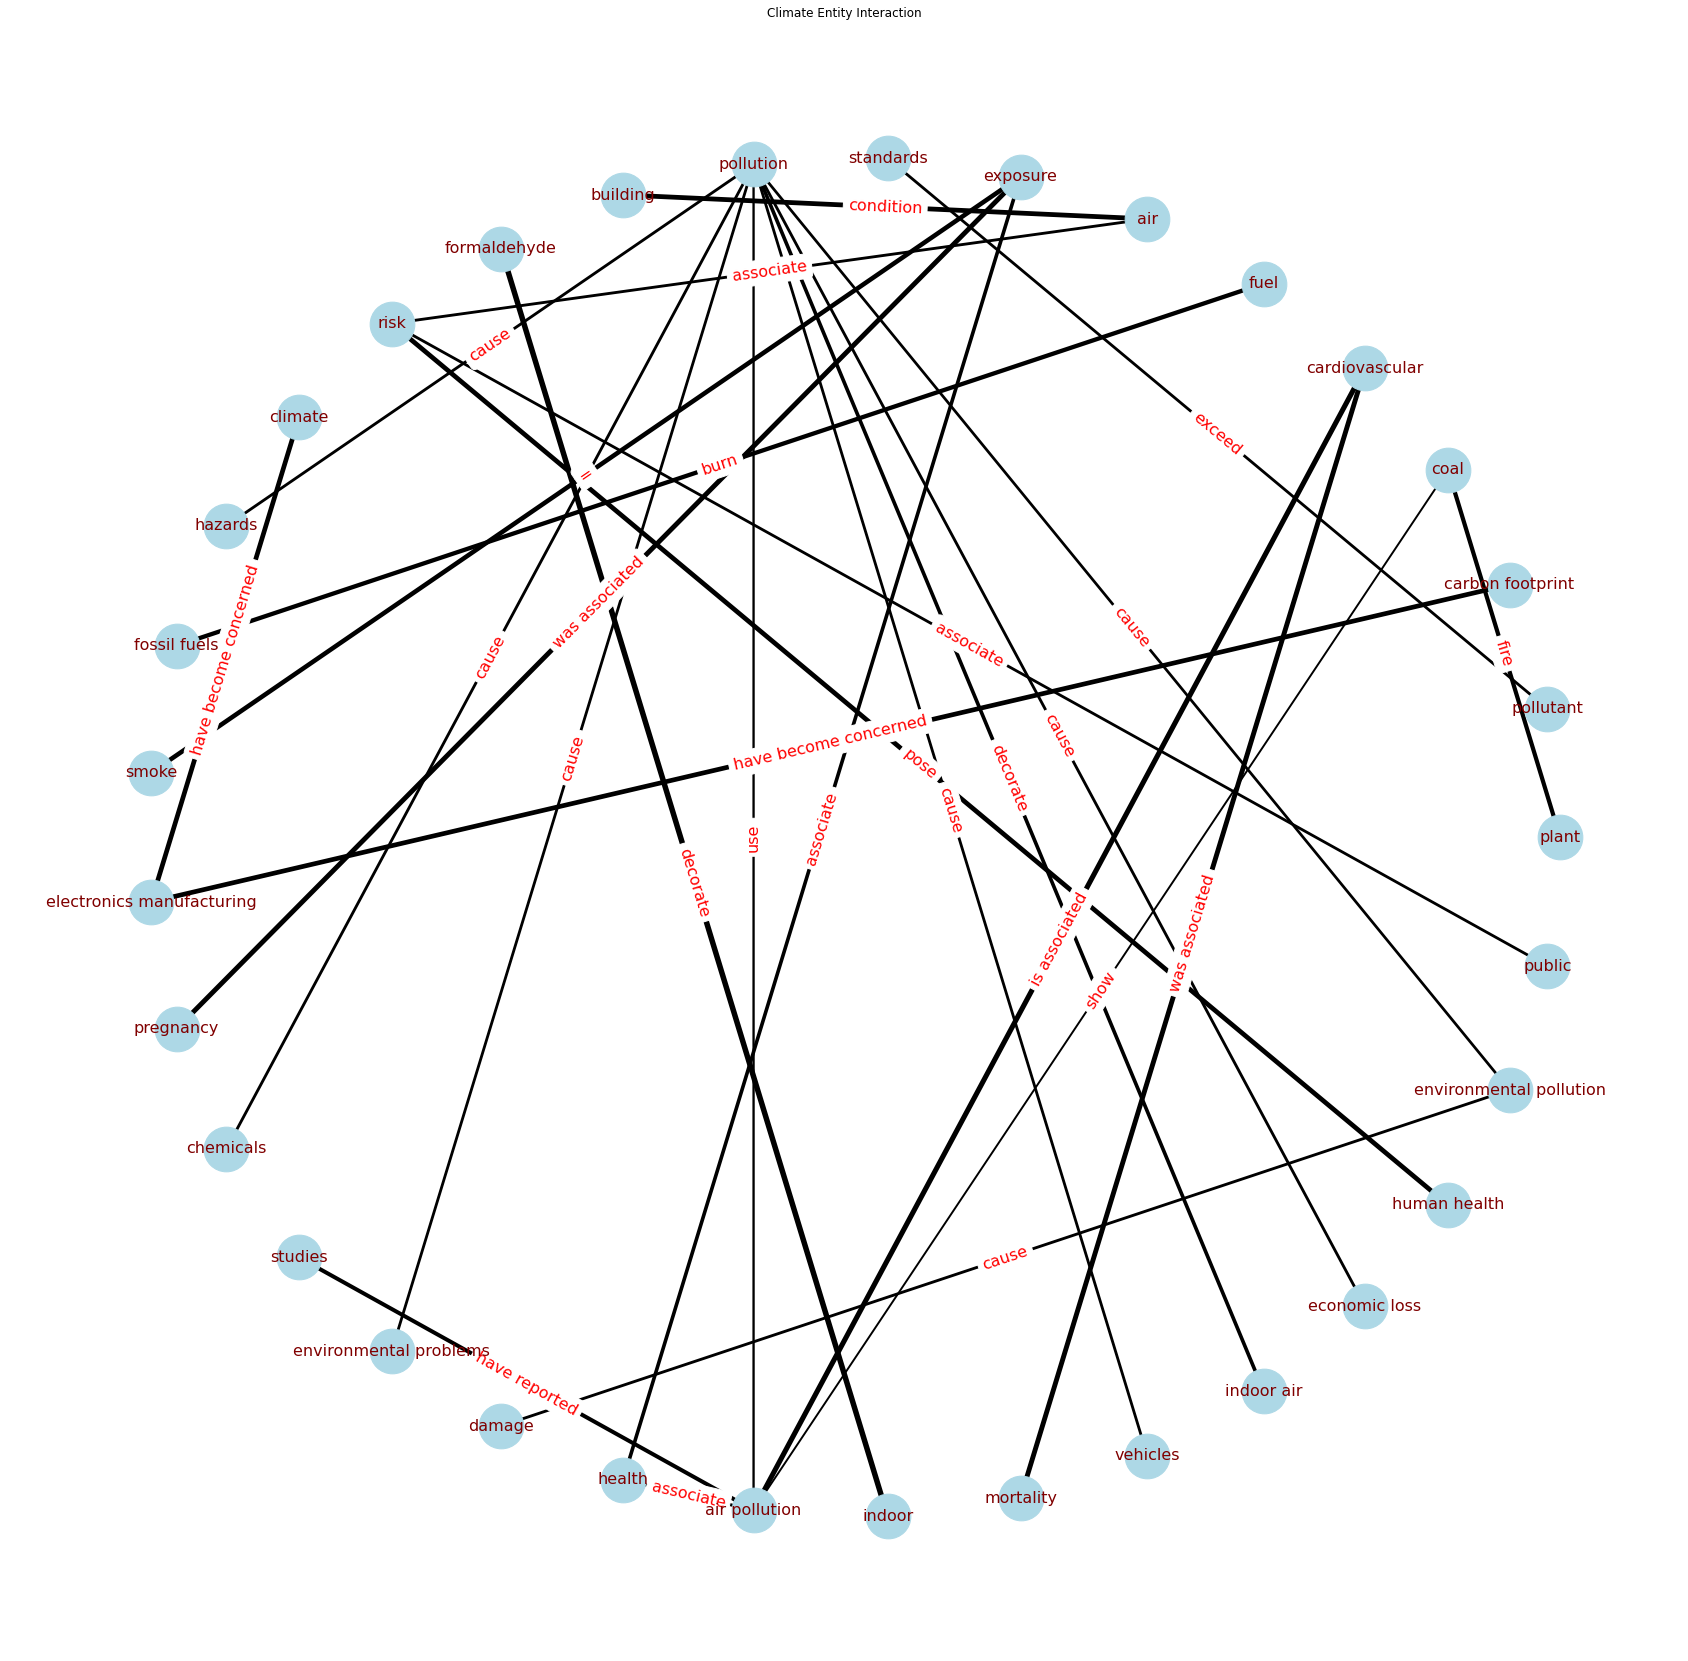

In [113]:
import matplotlib.pyplot as plt
import networkx as nx
import random
 
def plot_weighted_graph():
    "Plot a weighted graph"
    #Create a graph object called G
    G = nx.Graph()
    
    top_keywords = list(get_top_keywords())
    random.shuffle(top_keywords)
    
    for node in top_keywords:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    layout = "circle"
    #pos = nx.multipartite_layout(G)
    #pos = nx.kamada_kawai_layout(G)
    pos = nx.circular_layout(G)
    #pos=nx.random_layout(G) 
    #pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_color='lightblue', node_size=2000)
 
    #If you want, add labels to the nodes
    labels = {}
    for node_name in top_keywords:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=16, font_color='maroon')
    
    #Add edges
    edge_labels = {}
    for nere in picked_nere:
        G.add_edge(nere["e1"], nere["e2"], weight = nere["tf_idf"])
        edge_labels[(nere["e1"],nere["e2"])] = nere["r"]
    
    #Iterate through the graph nodes to gather all the weights
    all_weights = []
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #Get unique weights
    unique_weights = list(set(all_weights))
    
    #Plot the edges - one by one!
    for weight in unique_weights:
        #Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(top_keywords)*3.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
    
    #Add edge labels -- relations
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=16)
 
    #Plot the graph
    plt.rcParams["figure.figsize"] = (30,30)
    plt.axis('off')
    plt.title('Climate Entity Interaction')
    plt.savefig("climate_entity_graph_%s.png"%(layout)) 
    plt.show() 

plot_weighted_graph()

In [22]:
print(get_top_keywords())

set()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
 
def plot_weighted_graph():
    "Plot a weighted graph"
    #Create a graph object called G
    G = nx.Graph()
    
    top_keywords = [x.strip() for x in keyword_freq_sorted.keys()]
    random.shuffle(top_keywords)
    
    for node in top_keywords:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    pos=nx.random_layout(G) 
    #pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos,node_color='lightblue',node_size=[v * 0.1 for v in keyword_freq_sorted.values()])
 
    #3. If you want, add labels to the nodes
    labels = {}
    for node_name in top_keywords:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=16, font_color='maroon')
 
 
    #4. Add the edges (4C2 = 6 combinations)
    #NOTE: You usually read this data in from some source
    #To keep the example self contained, I typed this out
    l = len(keyword_co_matrix)
    
    for i in range(0,l):
        for j in range(i+1,l):
            w = keyword_co_matrix[top_keywords[i]][top_keywords[j]]
            if(w!=0):
                G.add_edge(top_keywords[i], top_keywords[j], weight = w)
 
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
    #print(unique_weights)
 
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(top_keywords)*30.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
 
    #Plot the graph
    plt.rcParams["figure.figsize"] = (30,30)
    plt.axis('off')
    plt.title('Climate Entity Interaction')
    plt.savefig("climate_entity_graph.png") 
    plt.show() 

plot_weighted_graph()